In [10]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats

path = 'data/'

# Problem 1

### Getting familiar with loading, visualizing and operating on multivariate data

A Hess diagram is a 2D plot coded by a third quantity.

Here's an example from the [astroML documentation](https://www.astroml.org/examples/datasets/plot_SDSS_SSPP.html) showing the temperature and surface gravity (how strongly the star would pull on you if you could stand on it's surface, including the effect of rotation), color coded on the left by density, and on the right by metallicity (measured here as the ratio of iron to hydrogen) with density contours.


<img src="https://www.astroml.org/_images/plot_SDSS_SSPP_1.png">

From http://das.sdss.org/va/stripe_82_variability/SDSS_82_public/, download one of the HLC\*fits.gz files (and use `astropy.io.fits` to load one of them)

The HLC files are each different bands on the sky.

You should separate stars and galaxies by using the `MEAN_OBJECT_TYPE` column and making a cut with value > 5 to find stars (and similarly <=5 to find galaxies).

For this problem, we want to make stars and galaxies make a 3-panel plot.

In the left plot show `r` vs `g-i` color coded by density (I would suggest numpy.histogram2d and matplotlib.pyplot.pcolormesh, but you can use whatever). Plot the contours on top.

In the middle and right panel, again plot `r` vs `g-i`, but now color-coded by proper motion in RA, and Dec.

Comment on the diffeence in structure in stars vs galaxies.

In [43]:
fits_image_filename = path + 'HLC.RA_03_to_04.fits.gz'

with fits.open(fits_image_filename) as hdul:
    hdul.info()
    #hdul['MEAN_OBJECT_TYPE']
    #print(hdul[1].data)

Filename: data/HLC.RA_03_to_04.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    171   128785R x 77C   [46A, 24A, 5I, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5I, 5I, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, D, E, E, 5E, D, E, E, E, D, E, E, E, E, E, E, E, D, E, E, E, D, E, E, E, E, E, E, E, D, D, I, I, E, E, D, E, E, D, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E]   


# Problem 2

### Comparing distributions to a standard normal distribution

Load the `IntroStat_demo.csv` file in the data directory (use `pandas` or `astropy` or whatever you like).

Estimate the sample mean and variance of the suspiciously named `mag.outlier` column.

Make a Q-Q plot (I suggest statsmodels.graphics.gofplots.qqplot) of the `mag.outlier` column and over plot a line with `Y = Mean + Sigma*X` on it. 

Calculate the values of the first and third quartiles, and use some linear algebra to figure out the equation of a line passing through them (google line 2 point form if you need a refresher on the linear algebra)

Overplot that line passing through the data.

Now try the same thing with `mag.het`. Describe what you found?

What happens if you rescale the data? Subtract of the sample mean of `mag.het` and divide by `mag.het.error`. Now repeat the Q-Q plot with this quantity. 

Describe what's going on.

In [54]:
# import data
df = pd.read_csv(path+'IntroStat_demo.csv')
print(df)

         time    mag.hom  mag.outlier      mag.t    mag.het  mag.het.error  \
0    0.000000  18.558944    18.530677  18.560527  18.567447       0.067345   
1    0.176158  18.531178    18.551560  18.549906  18.547315       0.017149   
2    0.250165  18.553669    18.468095  18.544618  18.564191       0.020600   
3    1.426983  18.539475    18.537368  18.560818  18.554162       0.074339   
4    1.677148  18.575442    18.790521  18.556126  18.514765       0.027469   
..        ...        ...          ...        ...        ...            ...   
69  10.757089  18.537689    18.571678  18.543100  18.466822       0.045315   
70  10.933247  18.553604    18.554656  18.534926  18.630141       0.072181   
71  11.007254  18.547965    18.553508  18.542977  18.568285       0.087981   
72  11.507584  18.558160    18.558386  18.548952  18.462255       0.087348   
73  11.757748  18.546884    18.518463  18.539153  18.585988       0.043656   

         mag5  mag5.error  
0   18.546056    0.009766  
1   18.

Mean: 18.561082466856572 Variance: 0.005150698425781927


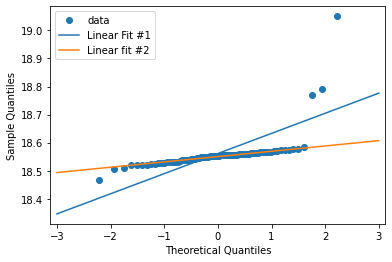

In [39]:
# do the plots for outlier

# plot the q-q
name = 'mag.outlier'
col = df[name]
mean = col.mean()
std = col.std()
var = std*std
print("Mean:",mean,"Variance:",var)
fig = sm.qqplot(col,label="data")

# plot the linear fit
x = np.linspace(-3,3)
y = mean + std*x
plt.plot(x,y,label="Linear Fit #1")

# first and third quartile of stad normal dist
x1 = -0.67448
x3 = 0.67448

# find 1st and 3rd quatiles of this dist 
quant = np.quantile(col,[0.25,0.75])
#print(quant)
y1 = quant[0]
y3 = quant[1]

#find the line going through (x1,y1) and (x3,y3)
slope = (y3-y1)/(x3-x1)
intercept = y1 -slope*x1 

plt.plot(x,x*slope+intercept,label="Linear fit #2")

plt.legend()
plt.show()

Mean: 18.54834115592681 Variance: 0.002079878204257082


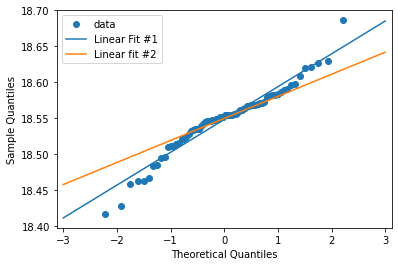

In [40]:
# do plots for het

# plot the q-q
name = 'mag.het'
col = df[name]
mean = col.mean()
std = col.std()
var = std*std
print("Mean:",mean,"Variance:",var)
fig = sm.qqplot(col,label="data")

# plot the linear fit
x = np.linspace(-3,3)
y = mean + std*x
plt.plot(x,y,label="Linear Fit #1")

# first and third quartile of stad normal dist
x1 = -0.67448
x3 = 0.67448

# find 1st and 3rd quatiles of this dist 
quant = np.quantile(col,[0.25,0.75])
#print(quant)
y1 = quant[0]
y3 = quant[1]

#find the line going through (x1,y1) and (x3,y3)
slope = (y3-y1)/(x3-x1)
intercept = y1 -slope*x1 

plt.plot(x,x*slope+intercept,label="Linear fit #2")

plt.legend()
plt.show()

The first linear fit, takes into account all the data set, with outliers. For the second linear fit, we are removing outliers, by only focusing on a subset of the data range between 25% and 75%. That way we make the second linear fit noticebly much better for the data set with outliers. The second data set has fewer outliers, so the data slicing does not improve the fit noticeably.

Mean: -8.434694384381932e-15 Variance: 1.0


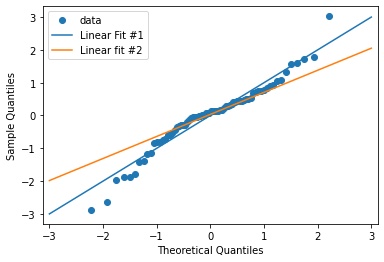

In [42]:
# plot the q-q
name = 'mag.het'
col = df[name]
mean = col.mean()
std = col.std()
var = std*std
col = (col-mean)/std
mean = col.mean()
std = col.std()
var = std*std
print("Mean:",mean,"Variance:",var)

fig = sm.qqplot(col,label="data")

# plot the linear fit
x = np.linspace(-3,3)
y = mean + std*x
plt.plot(x,y,label="Linear Fit #1")

# first and third quartile of stad normal dist
x1 = -0.67448
x3 = 0.67448

# find 1st and 3rd quatiles of this dist 
quant = np.quantile(col,[0.25,0.75])
#print(quant)
y1 = quant[0]
y3 = quant[1]

#find the line going through (x1,y1) and (x3,y3)
slope = (y3-y1)/(x3-x1)
intercept = y1 -slope*x1 

plt.plot(x,x*slope+intercept,label="Linear fit #2")

plt.legend()
plt.show()

By subtracting the mean we are recentering our distribution around 0. By dividing by the stddev we are rescaling the data to be normalized. This way we can compare our data to the standard normal distribution (mean=0,std_dev=1). Notice the x and y axes are now on par, so slope(variance) of 1 means our data was drawn from a gaussian dist. We can infer the data is normal, since most of the points lie along the first line of best fit. The second line of best fit is not necessary since we don't have as many strong outliers. 

# Problem 3

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.

Split the data into LMC and SMC, and then again by mode F and 1, and plot the `W` on the y-axis vs `log(P1)` on x.
Fit or estimate straight lines to each of the four samples (you can use `statsmodels` `astropy` `scipy` `numpy`....)
(Yes, we've not covered fitting straight lines. That's OK.)

Compute the residuals of each sample to it's respective line. Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

Plot the residuals color coded by if they are positive or negative vs RA and Dec (just like a Hess diagram in Problem 1). What do you see?

In [57]:
# import data
df = pd.read_csv(path+'Cepheids.csv')
print(df)

                   name       RA0      Decl0 Mode Cloud         W     logP1  \
0     OGLE-LMC-CEP-0002  4.529733 -69.819330    F   LMC  14.52500  0.493893   
1     OGLE-LMC-CEP-0005  4.592089 -69.734970    F   LMC  13.49540  0.749122   
2     OGLE-LMC-CEP-0012  4.630203 -67.214420    F   LMC  14.54210  0.424912   
3     OGLE-LMC-CEP-0016  4.642367 -67.646310    F   LMC  12.03300  1.021456   
4     OGLE-LMC-CEP-0017  4.649119 -69.688390    F   LMC  14.34215  0.565524   
...                 ...       ...        ...  ...   ...       ...       ...   
7264  OGLE-SMC-CEP-4622  1.404808 -73.269361    1   SMC  15.94460  0.141140   
7265  OGLE-SMC-CEP-4624  1.406767 -74.192639    1   SMC  15.29565  0.102449   
7266  OGLE-SMC-CEP-4625  1.407181 -72.936056    1   SMC  15.33725  0.074740   
7267  OGLE-SMC-CEP-4627  1.413575 -72.599167    1   SMC  14.06670  0.501477   
7268  OGLE-SMC-CEP-4628  1.419358 -73.926583    1   SMC  16.53315 -0.438446   

         VI  
0     0.740  
1     0.752  
2     0.5

In [58]:
# split data between Large and Small Magelanic cloud
df_LMC = df[df['Cloud'] =="LMC"]
df_SMC = df[df['Cloud'] =="SMC"]
print(df_LMC)
print(df_SMC)

                   name       RA0      Decl0 Mode Cloud         W     logP1  \
0     OGLE-LMC-CEP-0002  4.529733 -69.819330    F   LMC  14.52500  0.493893   
1     OGLE-LMC-CEP-0005  4.592089 -69.734970    F   LMC  13.49540  0.749122   
2     OGLE-LMC-CEP-0012  4.630203 -67.214420    F   LMC  14.54210  0.424912   
3     OGLE-LMC-CEP-0016  4.642367 -67.646310    F   LMC  12.03300  1.021456   
4     OGLE-LMC-CEP-0017  4.649119 -69.688390    F   LMC  14.34215  0.565524   
...                 ...       ...        ...  ...   ...       ...       ...   
5632  OGLE-LMC-CEP-3368  5.266611 -69.513083    1   LMC  16.94960 -0.572217   
5633  OGLE-LMC-CEP-3370  5.353917 -70.147611    1   LMC  16.79315 -0.569856   
5634  OGLE-LMC-CEP-3371  5.526572 -70.094833    1   LMC  17.53350 -0.569003   
5635  OGLE-LMC-CEP-3373  5.552631 -71.528361    1   LMC  17.51980 -0.558736   
5636  OGLE-LMC-CEP-3375  6.184861 -71.086889    1   LMC  17.35415 -0.591610   

         VI  
0     0.740  
1     0.752  
2     0.5

In [62]:
# split data between fundamental and first frequency for LMC
df_LMC_f = df_LMC[df_LMC['Mode'] =="F"]
df_LMC_1 = df_LMC[df_LMC['Mode'] =="1"]
print(df_LMC_f)
print(df_LMC_1)

                   name       RA0     Decl0 Mode Cloud         W     logP1  \
0     OGLE-LMC-CEP-0002  4.529733 -69.81933    F   LMC  14.52500  0.493893   
1     OGLE-LMC-CEP-0005  4.592089 -69.73497    F   LMC  13.49540  0.749122   
2     OGLE-LMC-CEP-0012  4.630203 -67.21442    F   LMC  14.54210  0.424912   
3     OGLE-LMC-CEP-0016  4.642367 -67.64631    F   LMC  12.03300  1.021456   
4     OGLE-LMC-CEP-0017  4.649119 -69.68839    F   LMC  14.34215  0.565524   
...                 ...       ...       ...  ...   ...       ...       ...   
1801  OGLE-LMC-CEP-3342  6.078483 -68.53606    F   LMC  14.47185  0.388043   
1802  OGLE-LMC-CEP-3352  6.109272 -71.60722    F   LMC  13.76250  0.608085   
1803  OGLE-LMC-CEP-3353  6.135569 -68.94975    F   LMC  14.22715  0.524583   
1804  OGLE-LMC-CEP-3355  6.178231 -71.52875    F   LMC  14.62815  0.374918   
1805  OGLE-LMC-CEP-3357  6.192878 -71.16153    F   LMC  13.98130  0.581803   

         VI  
0     0.740  
1     0.752  
2     0.598  
3     1

In [63]:
# split data between fundamental and first frequency for SMC
df_SMC_f = df_SMC[df_SMC['Mode'] =="F"]
df_SMC_1 = df_SMC[df_SMC['Mode'] =="1"]
print(df_SMC_f)
print(df_SMC_1)

                   name       RA0     Decl0 Mode Cloud         W     logP1  \
1806  OGLE-SMC-CEP-0001  0.335519 -74.54853    F   SMC  16.45430  0.052410   
1807  OGLE-SMC-CEP-0005  0.364969 -72.37297    F   SMC  16.29465  0.109718   
1808  OGLE-SMC-CEP-0006  0.365656 -73.91553    F   SMC  16.06830  0.171660   
1809  OGLE-SMC-CEP-0007  0.367853 -73.44867    F   SMC  16.13180  0.125224   
1810  OGLE-SMC-CEP-0008  0.371878 -74.45939    F   SMC  16.80580 -0.028503   
...                 ...       ...       ...  ...   ...       ...       ...   
4404  OGLE-SMC-CEP-4621  1.399717 -73.97078    F   SMC  16.30185  0.238377   
4405  OGLE-SMC-CEP-4623  1.405381 -72.96700    F   SMC  15.71910  0.132346   
4406  OGLE-SMC-CEP-4626  1.410822 -73.04558    F   SMC  15.89275  0.108198   
4407  OGLE-SMC-CEP-4629  1.436944 -74.13447    F   SMC  12.54100  1.095727   
4408  OGLE-SMC-CEP-4630  1.451217 -73.81892    F   SMC  12.88370  1.019068   

         VI  
1806  0.554  
1807  0.557  
1808  0.674  
1809  0

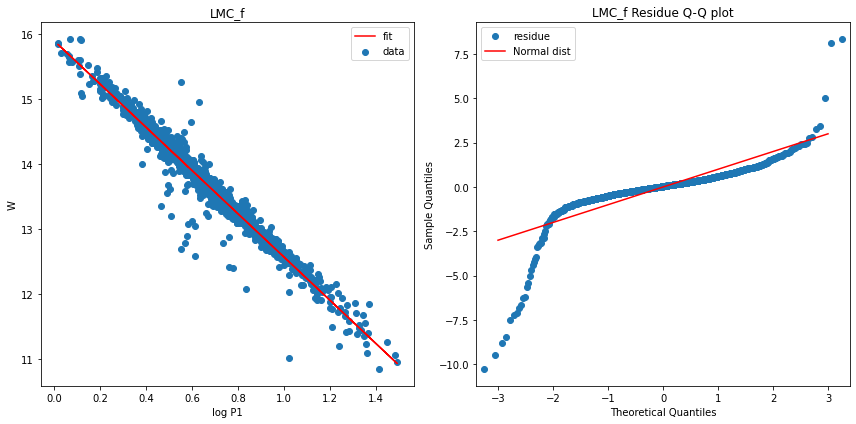

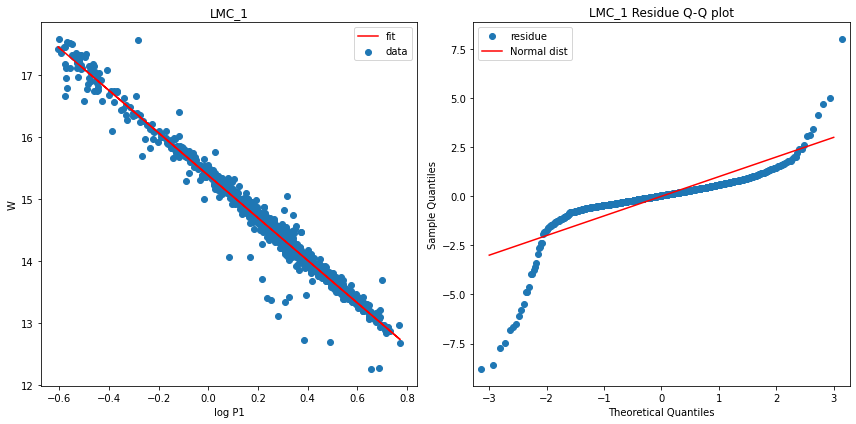

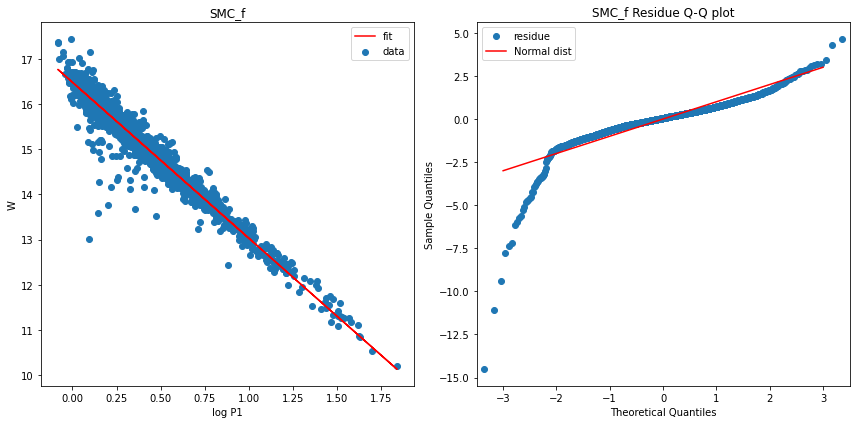

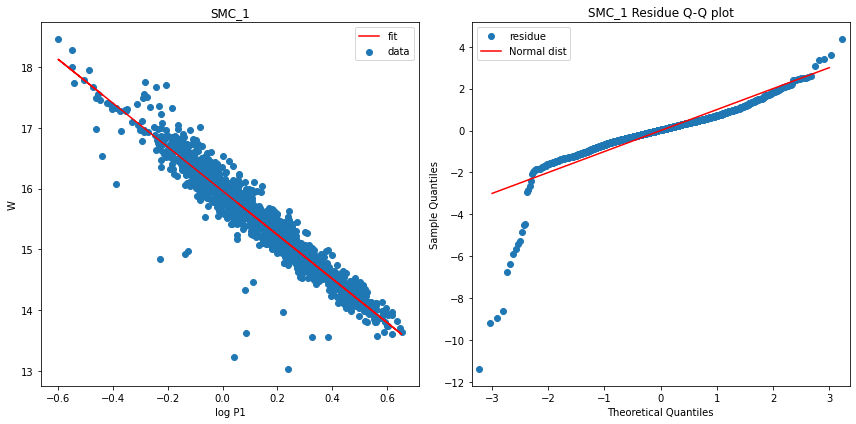

In [112]:
df_list = [df_LMC_f,df_LMC_1,df_SMC_f,df_SMC_1]
labels = ["LMC_f","LMC_1","SMC_f","SMC_1"]

for i,dfi in enumerate(df_list):
    
    # put figures side by side
    size = 6
    fig,axes = plt.subplots(1,2,figsize=(size*2,size))
    
    # plot the data 
    plt.sca(axes[0])
    x = dfi['logP1'] 
    y = dfi['W'] 
    plt.scatter(x,y,label="data")
    plt.title(labels[i])
    plt.xlabel("log P1")
    plt.ylabel("W")
    
    # calcualte linear fit
    m , b = np.polyfit(x, y, 1)
    plt.plot(x,m*x+b,label="fit",color="red")
    plt.legend()
    #plt.show()
    
    # calculate residues and rescale to compare in Q-Q plot 
    plt.sca(axes[1])
    res = y-(m*x+b)
    mean = res.mean()
    std = res.std()
    res_qq = (res - mean)/std
    #print(res)
    fig = sm.qqplot(res_qq,label="residue",ax=axes[1])
    plt.title(labels[i] + " Residue Q-Q plot")
    xqq = np.linspace(-3,3)
    plt.plot(xqq,xqq,label="Normal dist",color="red")
    plt.legend()
    plt.tight_layout()
    plt.show()


Looking at the magnitude(log luminosity) vs log of period we can see a clear linear trend. Which corresponds to a power law relation between luminosity and period. 
If we then turn our atttention to the residue Q-Q plot, we can see the errors are normally distributed. That is for the most part, with some big outliers on the far ends of the tails.

# Extra Credit: Please fill out the pre-term survey ( https://forms.gle/WA1am6pLe7EkLmgu5 ) and note that you did so below

In [2]:
print("done!")

done!
